# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import LocallyLinearEmbedding as LLE

# Load data

In [2]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


# PCA + Random forest

Task 1: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [4]:
r = 42

In [5]:
RFC = RandomForestClassifier(random_state=r)
RFC.fit(X_train, y_train)
accuracy_score(y_test, RFC.predict(X_test))

0.9861111111111112

Task 2: Now do the same, but use PCA.

In this task, we want to keep all of the variance! No data is going to be discarded.
You are asked to use the maximal number of componenets for PCA.

Q1: Your co-worker says that the results should be at least as good as the results we had without PCA. Explain why might he say that.

Print the accuracy of Random forest + PCA.

In [6]:
pca = PCA(random_state=r).fit(X_train)
X_train_pca = pca.transform(X_train)
RFC = RandomForestClassifier(random_state=r)
RFC.fit(X_train_pca, y_train)
accuracy_score(y_test, RFC.predict(pca.transform(X_test)))

0.9166666666666666

Q2: Did the results improve\stayed the same\got worse? 

They got worse, since we have just transformed our feature space which means that the relationship between the features has been shifted, which likely affects the ability of the Random Forest Classifier to make clean splits in the data.

# PCA + logistice regression

Task 3: repeat task 1 with logistic regression.

Task 4: repeast task 2 with logistic regression.

In [7]:
LR = LogisticRegression(random_state=r, max_iter=5000)
LR.fit(X_train, y_train)
print(accuracy_score(y_test, LR.predict(X_test)))

LR = LogisticRegression(random_state=r, max_iter=5000)
LR.fit(X_train_pca, y_train)
print(accuracy_score(y_test, LR.predict(pca.transform(X_test))))

0.9583333333333334
0.9444444444444444


/Users/Adam/.ve/yandex/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Q3: Did the results improved\stayed the same\got worse?

They stayed pretty much the same

Q4: How can you explain the difference between answers to Q2 and Q3. Hint: think about the nature of Logistic regression and the main difference of Random forest from it.

The two algorithms create decision boundaries in fundamentally different ways: Logistic Regression is a linear function that splits the feature space into two regions, while Random Forest/Decision Trees create smaller and smaller subspaces that are then combined into a decision boundary. This means that Decision trees do a better job when the classes are well separated or have a non-linear boundary, whereas logistic regression will generalize better on a noisier dataset. When we do PCA, we shift the axes of the feature space in order to maximize variance, but that increase in variance does not necessarily correspond to a clearer separation of the different classes, in fact it might do the opposite. A Decision Tree will have an even harder time creating a good decision boundary if the classes are not well separated, while logistic regression is not as affected.

# Visualizing

Task 5: Use locally linear embedding in sklearn to visualize the data. Plot the results.
Optimze the n_neighbors by running at least 5 times and use the best looking result you can find.

In [8]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

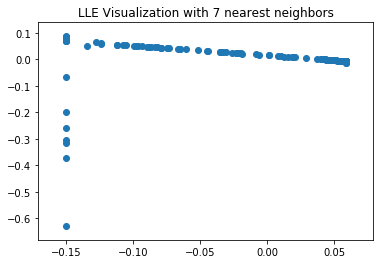

In [9]:
linear_embedding = LLE(n_neighbors=7, random_state=r)
X_trans = linear_embedding.fit_transform(X)
plt.scatter(X_trans[:, 0], X_trans[:, 1])
plt.title("LLE Visualization with 7 nearest neighbors");

Task 6: Use t-SNE to visualize the data. Plot the results.

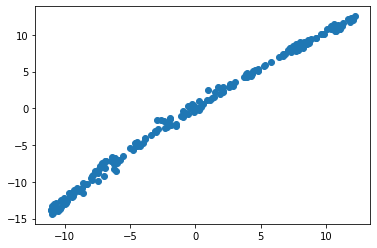

In [12]:
X_embedded = TSNE().fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1]);
# plt.legend(range(4, 9));

Task 7: Use UMAP to visualize the data. Plot the results.

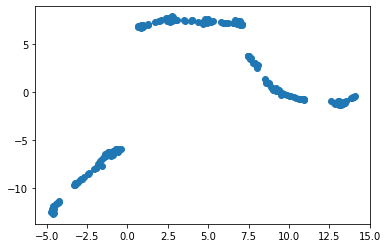

In [13]:
reducer = umap.UMAP(random_state=r)
embedding = reducer.fit_transform(X)
plt.scatter(embedding[:, 0], embedding[:, 1]);

Q5: If we run one of this visualziaing algorithms various times with the default parameters, are we guranteed to see the same results? Why?

We won't see the same results for TSNE and UMAP if we use a different random state to initialize them, as both use probabilistic cost functions and are therefore non-deterministic algorithms. LLE won't vary since it depends on the distances between the k-nearest neighbors of each point, which don't vary  